In [50]:
from hydra import initialize, compose
from omegaconf import OmegaConf
from hydra.core.global_hydra import GlobalHydra

# for import from src
import sys
import os

import cv2
from natsort import natsorted
import matplotlib.pyplot as plt
from tqdm import tqdm

sys.path.insert(0, '../')


In [32]:
def getConfig():
    GlobalHydra.instance().clear()
    initialize(version_base=None, config_path="../configs/", job_name="notebook") 
    cfg = compose(config_name="config")
    return cfg

In [33]:
config = getConfig()
config

{'dataset': {'name': 'custom', 'path': 'data/augmented/', 'saved_images': False}, 'model': {'name': 'srresunet', 'pretrained': False, 'in_channels': 3, 'out_channels': 3, 'num_filters': 32, 'num_residuals': 2}, 'training': {'epochs': 1, 'batch_size': 32, 'loss': 'l1', 'optimizer': 'adam', 'learning_rate': 0.001, 'lr_scheduler_enabled': False, 'lr_step_size': 10, 'lr_gamma': 0.1}, 'other': {'log_print': True, 'wandb': False, 'run_testing': True}}

In [64]:
print(config.get("run_testing", False))
print(config.other.get("run_testing", False))


False
True


In [59]:
high_res_path = os.path.join("../", os.path.join(os.path.join(config.dataset.path,  "test"), "high_res"))
low_res_path = os.path.join("../", os.path.join(os.path.join(config.dataset.path,  "test"), "low_res"))

In [60]:
high_img_paths = natsorted([os.path.join(high_res_path, f) for f in os.listdir(high_res_path) if f.endswith('.png')])
low_img_paths = natsorted([os.path.join(low_res_path, f) for f in os.listdir(low_res_path) if f.endswith('.png')])

print(f"Number of high resolution images: {len(high_img_paths)}")
print(f"Number of low resolution images: {len(low_img_paths)}")

Number of high resolution images: 987
Number of low resolution images: 987


In [61]:
# check if all the images have same size
high_res_shape = (480, 640, 3)
low_res_shape = (120, 160, 3)
high_res_count = 0
low_res_count = 0
for high_img_path, low_img_path in tqdm(zip(high_img_paths, low_img_paths), total=len(high_img_paths)):
    high_img = cv2.imread(high_img_path)
    low_img = cv2.imread(low_img_path)
    
    if high_img.shape != high_res_shape:
        #print(f"High resolution image {high_img_path} has shape {high_img.shape}, expected {high_res_shape}")
        high_res_count += 1
    if low_img.shape != low_res_shape:
        #print(f"Low resolution image {low_img_path} has shape {low_img.shape}, expected {low_res_shape}")
        low_res_count += 1

print(f"Number of high resolution images with incorrect shape: {high_res_count}")
print(f"Number of low resolution images with incorrect shape: {low_res_count}")

100%|██████████| 987/987 [00:04<00:00, 200.58it/s]

Number of high resolution images with incorrect shape: 0
Number of low resolution images with incorrect shape: 0


/mnt/vol3/Datasets/thermal_image/flir_frames7/frame_00100_min28.4_max62.3.png
/mnt/vol3/Datasets/thermal_image/webcam_frames7/frame_00100.png


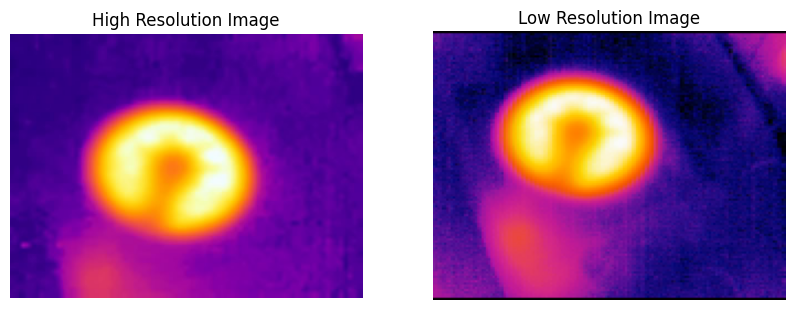

In [24]:
INDEX = 100

print(high_img_paths[INDEX])
print(low_img_paths[INDEX])

high_img = cv2.imread(high_img_paths[INDEX])
low_img = cv2.imread(low_img_paths[INDEX])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(high_img, cv2.COLOR_BGR2RGB))
plt.title("High Resolution Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(low_img, cv2.COLOR_BGR2RGB))
plt.title("Low Resolution Image")
plt.axis('off')
plt.show()


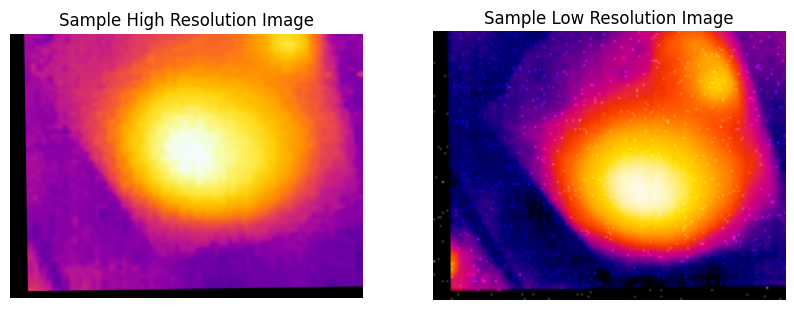

High Resolution Image Shape: (480, 640, 3)
Low Resolution Image Shape: (122, 160, 3)


In [30]:
INDEX = 15

sam1 = cv2.imread(f"../data/augmented/train/high_res/aug_{INDEX}.png")
sam2 = cv2.imread(f"../data/augmented/train/low_res/aug_{INDEX}.png")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(sam1, cv2.COLOR_BGR2RGB))
plt.title("Sample High Resolution Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sam2, cv2.COLOR_BGR2RGB))
plt.title("Sample Low Resolution Image")
plt.axis('off')
plt.show()

print("High Resolution Image Shape:", sam1.shape)
print("Low Resolution Image Shape:", sam2.shape)